<a href="https://colab.research.google.com/github/rajprasad001/deep_learning_concepts/blob/master/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 2

Pawan Kumar : 224230

Raj Rajeshwari Prasad : 224237

Sesha Sai Bhavaraju Kiran : 224160

# Regularization

* Motivation: Investigate how different Regularization techniques affect the training behavior.

* Dataset : Cifar10

* Architecture : Best model from Task1's architecture

* Regularization techniques:
 * L1, L2 regularizer
 * Dropouts
 * Adding noise

* Comparision Criteria: Training Curves
 * Steps still convergence
 * Training accuracy untill convergence
 * Stability of training

## Importing Libraries

In [44]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
#from tensorflow.keras import datasets#, layers, models

## Loading and Splitting Data

In [45]:
#Splitting the data into Train and Test. The Test Data should be completely unseen.
#By default 10000 instances are used as test data in Cifar10
(cifar_train_x_temp, cifar_train_y_temp), (cifar_test_x , cifar_test_y) =cifar10.load_data() 

#Further, for hyperparameter tuning, 20% of the train data is futher split into train and validation data
cifar_train_x, cifar_val_x, cifar_train_y, cifar_val_y = train_test_split(cifar_train_x_temp, cifar_train_y_temp, test_size=0.20, random_state=42)

#Standardizing the dataset
cifar_train_x, cifar_val_x, cifar_test_x = cifar_train_x/255.0, cifar_val_x/255.0, cifar_test_x/255.0

print('cifar10 train data      : {}'.format(cifar_train_x.shape))
print('cifar10 validation data : {}'.format(cifar_val_x.shape))
print('cifar10 test data       : {}'.format(cifar_test_x.shape))

cifar10 train data      : (40000, 32, 32, 3)
cifar10 validation data : (10000, 32, 32, 3)
cifar10 test data       : (10000, 32, 32, 3)


## Building Model without regularizer

In [72]:
def cnn_base_model(opt,train_x,train_y,epo,val_x,val_y,test_x,test_y):
  inputs = tf.keras.layers.Input((32,32,3))
  cnn_mod = tf.keras.layers.Conv2D(8,3, padding= 'SAME', activation='relu')(inputs)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(16,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(32,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(128,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.Flatten()(cnn_mod)
  cnn_mod = tf.keras.layers.Dense(10, activation='softmax')(cnn_mod)

  model = tf.keras.Model(inputs,cnn_mod)

  model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history = model.fit(train_x, train_y, epochs=epo, validation_data=(val_x, val_y))

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
  print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))

Epoch 1/30
1250/1250 [==============================] - 40s 32ms/step - loss: 2.1163 - accuracy: 0.3347 - val_loss: 2.0795 - val_accuracy: 0.3739
Epoch 2/30
1250/1250 [==============================] - 40s 32ms/step - loss: 2.0034 - accuracy: 0.4531 - val_loss: 1.9642 - val_accuracy: 0.4934
Epoch 3/30
1250/1250 [==============================] - 40s 32ms/step - loss: 1.9541 - accuracy: 0.5041 - val_loss: 1.9725 - val_accuracy: 0.4877
Epoch 4/30
1250/1250 [==============================] - 40s 32ms/step - loss: 1.9156 - accuracy: 0.5442 - val_loss: 1.9143 - val_accuracy: 0.5437
Epoch 5/30
1250/1250 [==============================] - 40s 32ms/step - loss: 1.8892 - accuracy: 0.5701 - val_loss: 1.8986 - val_accuracy: 0.5586
Epoch 6/30
1250/1250 [==============================] - 40s 32ms/step - loss: 1.8634 - accuracy: 0.5957 - val_loss: 1.8857 - val_accuracy: 0.5743
Epoch 7/30
1250/1250 [==============================] - 40s 32ms/step - loss: 1.8438 - accuracy: 0.6174 - val_loss: 1.8639 -

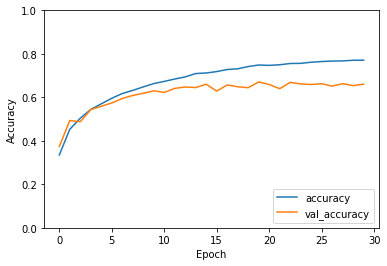

In [73]:
model2 = cnn_base_model('adam',cifar_train_x,cifar_train_y,30,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

## L2 Regularizer

In [64]:
def cnn_l2_model(opt,train_x,train_y,epo,val_x,val_y,test_x,test_y):
  inputs = tf.keras.layers.Input((32,32,3))
  cnn_mod = tf.keras.layers.Conv2D(8,3, padding= 'SAME', activation='relu')(inputs)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(16,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(32,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(128,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.Flatten()(cnn_mod)
  cnn_mod = tf.keras.layers.Dense(10, activation='softmax',kernel_regularizer='l2')(cnn_mod)

  model = tf.keras.Model(inputs,cnn_mod)

  model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history = model.fit(train_x, train_y, epochs=epo, validation_data=(val_x, val_y))

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  #plt.ylim([0.5, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
  print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))

Epoch 1/30
1250/1250 [==============================] - 40s 32ms/step - loss: 2.1800 - accuracy: 0.2890 - val_loss: 2.1713 - val_accuracy: 0.3028
Epoch 2/30
1250/1250 [==============================] - 39s 32ms/step - loss: 2.0845 - accuracy: 0.3967 - val_loss: 2.0627 - val_accuracy: 0.4217
Epoch 3/30
1250/1250 [==============================] - 40s 32ms/step - loss: 2.0461 - accuracy: 0.4388 - val_loss: 2.0196 - val_accuracy: 0.4629
Epoch 4/30
1250/1250 [==============================] - 40s 32ms/step - loss: 2.0160 - accuracy: 0.4690 - val_loss: 2.0065 - val_accuracy: 0.4847
Epoch 5/30
1250/1250 [==============================] - 40s 32ms/step - loss: 1.9974 - accuracy: 0.4916 - val_loss: 1.9745 - val_accuracy: 0.5176
Epoch 6/30
1250/1250 [==============================] - 39s 31ms/step - loss: 1.9772 - accuracy: 0.5142 - val_loss: 1.9594 - val_accuracy: 0.5337
Epoch 7/30
1250/1250 [==============================] - 40s 32ms/step - loss: 1.9602 - accuracy: 0.5324 - val_loss: 1.9544 -

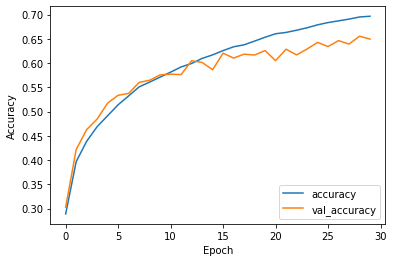

In [65]:
model3 = cnn_l2_model('adam',cifar_train_x,cifar_train_y,30,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

## Dropout Regularizer

In [69]:
def cnn_dropout_model(opt,train_x,train_y,epo,val_x,val_y,test_x,test_y):
  inputs = tf.keras.layers.Input((32,32,3))
  cnn_mod = tf.keras.layers.Conv2D(8,3, padding= 'SAME', activation='relu')(inputs)
  cnn_mod = tf.keras.layers.Dropout(0.5)(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(16,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.Dropout(0.5)(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(32,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.Dropout(0.5)(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(128,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.Dropout(0.5)(cnn_mod)
  cnn_mod = tf.keras.layers.Flatten()(cnn_mod)
  cnn_mod = tf.keras.layers.Dense(10, activation='softmax')(cnn_mod)

  model = tf.keras.Model(inputs,cnn_mod)

  model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history = model.fit(train_x, train_y, epochs=epo, validation_data=(val_x, val_y))

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  #plt.ylim([0.5, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
  print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))

Epoch 1/30
1250/1250 [==============================] - 47s 38ms/step - loss: 2.1421 - accuracy: 0.3072 - val_loss: 2.1634 - val_accuracy: 0.3633
Epoch 2/30
1250/1250 [==============================] - 49s 39ms/step - loss: 2.0753 - accuracy: 0.3792 - val_loss: 2.1075 - val_accuracy: 0.3959
Epoch 3/30
1250/1250 [==============================] - 47s 38ms/step - loss: 2.0471 - accuracy: 0.4081 - val_loss: 2.1279 - val_accuracy: 0.3504
Epoch 4/30
1250/1250 [==============================] - 47s 38ms/step - loss: 2.0384 - accuracy: 0.4176 - val_loss: 2.1447 - val_accuracy: 0.3095
Epoch 5/30
1250/1250 [==============================] - 47s 37ms/step - loss: 2.0281 - accuracy: 0.4262 - val_loss: 2.0871 - val_accuracy: 0.3834
Epoch 6/30
1250/1250 [==============================] - 47s 38ms/step - loss: 2.0170 - accuracy: 0.4391 - val_loss: 2.0273 - val_accuracy: 0.4419
Epoch 7/30
1250/1250 [==============================] - 47s 38ms/step - loss: 2.0073 - accuracy: 0.4485 - val_loss: 2.1336 -

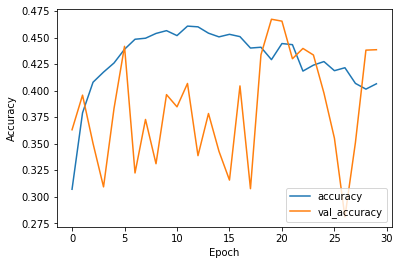

In [70]:
model4 = cnn_dropout_model('adam',cifar_train_x,cifar_train_y,30,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

## Batch Normalization

In [74]:
def cnn_bn_model(opt,train_x,train_y,epo,val_x,val_y,test_x,test_y):
  inputs = tf.keras.layers.Input((32,32,3))
  cnn_mod = tf.keras.layers.Conv2D(8,3, padding= 'SAME', activation='relu')(inputs)
  cnn_mod = tf.keras.layers.BatchNormalization()(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(16,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.BatchNormalization()(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(32,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.BatchNormalization()(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(128,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.BatchNormalization()(cnn_mod)
  cnn_mod = tf.keras.layers.Flatten()(cnn_mod)
  cnn_mod = tf.keras.layers.Dense(10, activation='softmax',kernel_regularizer='l2')(cnn_mod)

  model = tf.keras.Model(inputs,cnn_mod)

  model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history = model.fit(train_x, train_y, epochs=epo, validation_data=(val_x, val_y))

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  #plt.ylim([0.5, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
  print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))

Epoch 1/30
1250/1250 [==============================] - 53s 43ms/step - loss: 2.0333 - accuracy: 0.4225 - val_loss: 2.0098 - val_accuracy: 0.4450
Epoch 2/30
1250/1250 [==============================] - 52s 41ms/step - loss: 1.9297 - accuracy: 0.5267 - val_loss: 1.9451 - val_accuracy: 0.5124
Epoch 3/30
1250/1250 [==============================] - 53s 42ms/step - loss: 1.8870 - accuracy: 0.5716 - val_loss: 1.8950 - val_accuracy: 0.5622
Epoch 4/30
1250/1250 [==============================] - 52s 42ms/step - loss: 1.8572 - accuracy: 0.6016 - val_loss: 2.0039 - val_accuracy: 0.4534
Epoch 5/30
1250/1250 [==============================] - 52s 42ms/step - loss: 1.8359 - accuracy: 0.6233 - val_loss: 1.8596 - val_accuracy: 0.5992
Epoch 6/30
1250/1250 [==============================] - 54s 44ms/step - loss: 1.8228 - accuracy: 0.6364 - val_loss: 1.8742 - val_accuracy: 0.5825
Epoch 7/30
1250/1250 [==============================] - 53s 42ms/step - loss: 1.8033 - accuracy: 0.6562 - val_loss: 1.8468 -

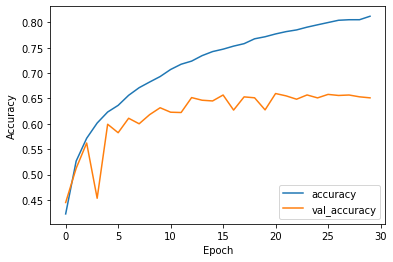

In [75]:
model5 = cnn_bn_model('adam',cifar_train_x,cifar_train_y,30,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

## Mix and Match

In [76]:
def cnn_mix_model(opt,train_x,train_y,epo,val_x,val_y,test_x,test_y):
  inputs = tf.keras.layers.Input((32,32,3))
  cnn_mod = tf.keras.layers.Conv2D(8,3, padding= 'SAME', activation='relu')(inputs)
  cnn_mod = tf.keras.layers.BatchNormalization()(cnn_mod)
  cnn_mod = tf.keras.layers.Dropout(0.2)(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(16,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.BatchNormalization()(cnn_mod)
  cnn_mod = tf.keras.layers.Dropout(0.2)(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(32,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.BatchNormalization()(cnn_mod)
  cnn_mod = tf.keras.layers.Dropout(0.2)(cnn_mod)
  cnn_mod = tf.keras.layers.MaxPool2D(2)(cnn_mod)
  cnn_mod = tf.keras.layers.Conv2D(128,3, padding= 'SAME', activation='relu')(cnn_mod)
  cnn_mod = tf.keras.layers.BatchNormalization()(cnn_mod)
  cnn_mod = tf.keras.layers.Flatten()(cnn_mod)
  cnn_mod = tf.keras.layers.Dense(10, activation='softmax')(cnn_mod)

  model = tf.keras.Model(inputs,cnn_mod)

  model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history = model.fit(train_x, train_y, epochs=epo, validation_data=(val_x, val_y))

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  #plt.ylim([0.5, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
  print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))

Epoch 1/30
1250/1250 [==============================] - 58s 47ms/step - loss: 2.0434 - accuracy: 0.4113 - val_loss: 2.0139 - val_accuracy: 0.4433
Epoch 2/30
1250/1250 [==============================] - 59s 47ms/step - loss: 1.9573 - accuracy: 0.4981 - val_loss: 2.0568 - val_accuracy: 0.3984
Epoch 3/30
1250/1250 [==============================] - 61s 49ms/step - loss: 1.9239 - accuracy: 0.5329 - val_loss: 1.9592 - val_accuracy: 0.4986
Epoch 4/30
1250/1250 [==============================] - 61s 49ms/step - loss: 1.8965 - accuracy: 0.5601 - val_loss: 2.0919 - val_accuracy: 0.3649
Epoch 5/30
1250/1250 [==============================] - 60s 48ms/step - loss: 1.8780 - accuracy: 0.5801 - val_loss: 1.9783 - val_accuracy: 0.4779
Epoch 6/30
1250/1250 [==============================] - 59s 47ms/step - loss: 1.8604 - accuracy: 0.5979 - val_loss: 1.9501 - val_accuracy: 0.5065
Epoch 7/30
1250/1250 [==============================] - 59s 48ms/step - loss: 1.8507 - accuracy: 0.6077 - val_loss: 1.9857 -

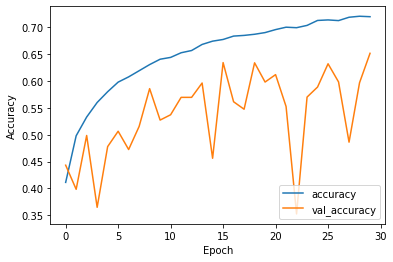

In [77]:
model6 = cnn_mix_model('adam',cifar_train_x,cifar_train_y,30,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

## Task Summary

| Architecture | Regularizer             | Total epochs | Training Accuracy | Validation Accuracy | Testing Accuracy | Observations                                                                      |
|--------------|-------------------------|--------------|-------------------|---------------------|------------------|-----------------------------------------------------------------------------------|
| CNN(Adam)    | None                    | 30           | 77.09             | 66.06               | 65.59            | Overfitting obs after 7 epochs                                                    |
| CNN(Adam)    | L2                      | 30           | 69.67             | 64.95               | 65.27            | Slight overfitting after 20 epochs                                                |
| CNN(Adam)    | Dropout(0.5)            | 30           | 40.66             | 43.87               | 44.15            | The validation accuracy was inconsistent throughout and had too much fluctuations |
| CNN(Adam)    | Batch Normalization     | 30           | 81.20             | 65.12               | 65.03            | No effect of reg. Overfitting obs after 5 epochs                                  |
| CNN(Adam)    | Mix(L2,Dropout(0.2),BN) | 30           | 71.97             | 65.16               | 64.49            | Strong fluctuation in validation accuracy.                                        |

For the task given a basic CNN Model was chosen with 4 conv layers. Without any regularization technique, overftting was prominent. With the help of L2 penalty, the overfitting was handled efficiently but also resulted in slower learning. On the other hand, Dropout regularizer was impacted by heavy fluctuation on the validation accuracy and creates an uncertainity in the model.
